In [ ]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

## Neutral Evolution as a random walk

This is an example of a biological question that can be described using a random walk.

We can use a random walk to describe the change of gene frequencies with time in a population.

The setup is as follows
 
 * The population has a fixed size N which remains constant through time.
 * Each individual carries one of two alleles "A" or "a".
 * Natural selection is not at work, so that each allele is equally likely to be passed on to the next generation.
 
This is known as neutral evolution. 

Several stochastic models have been proposed to describe neutral evolution such as the Moran model or the Wrigth-Fisher model. 

Under the assupmtions of neutral evolution, the probability of having $n$ allele "a" individuduals (assumed haploides) assuming that the frequency of allele "a" is $f$ is given by the binomial distribution

$$
P(n\mid f) = {N!\over n!}f^{n} (1-f)^{N-n}
$$

thus the probability of having a frequency $f_{t+\Delta t}$  at time $t+\Delta t$ is given by

$$
P(f_{t+\Delta t}\mid f_{t}) = \frac{P(n_t\mid f_t)}{N}.
$$

An neutrality implies that the frequency $f$ of allele "a" if there are $n_a$ instances at time $t$ is given by

$$
f_t = \frac{n_a}{N}
$$

The Markov process can then be described as

$$
f_t \rightarrow f_{t+\Delta t} = f_t + \frac{1}{N}\quad \mbox{with probability}\quad f_t(1-f_t)\\
f_t \rightarrow f_{t+\Delta t} = f_t - \frac{1}{N}\quad \mbox{with probability}\quad f_t(1-f_t)\\
f_t \rightarrow f_{t+\Delta t} = f_t \quad \mbox{with probability}\quad 1 - 2*f_t(1-f_t)
$$


And the master equation of the RW is given by

$$
\begin{aligned}
P(f\mid t+\Delta t) = 
 & \left(f-\frac{1}{N}\right)\left(1-f+\frac{1}{N}\right)\, P(f-\frac{1}{N}\mid t)\\
+& \left(f+\frac{1}{N}\right)\left(1-f-\frac{1}{N}\right)\, P(f+\frac{1}{N}\mid t)\\
+& \left(1-2*f(1-f)\right)\, P(f\mid t)
\end{aligned}
$$

From which we can derive the differential equations as

$$
\begin{aligned}
P(f\mid t+\Delta t) - P(f\mid t) = 
& \left(f-\frac{1}{N}\right)\left(1-f-\frac{1}{N}\right)\, P(f-\frac{1}{N}\mid t)\\
&+ \left(f+\frac{1}{N}\right)\left(1-f-\frac{1}{N}\right)\, P(f+\frac{1}{N}\mid t)\\
&- 2*f(1-f)\, P(f\mid t)
\end{aligned}
$$

or multiplying by $\frac{1}{\Delta t}$, and introducing the diffusion coefficient $D=\frac{(1/N)^2}{2 \Delta t}$,  

$$
\begin{aligned}
\frac{P(f\mid t+\Delta t) - P(f\mid t)}{\Delta t} 
=& 
2 D 
\frac{\left(f-\frac{1}{N}\right)\left(1-f-\frac{1}{N}\right)P(f-\frac{1}{N}\mid t) 
+ \left(f+\frac{1}{N}\right)\left(1-f-\frac{1}{N}\right) P(f+\frac{1}{N}\mid t) 
- 2f(1-f)P(f-\frac{1}{N}\mid t)}
{\frac{1}{N^2}}\\
=& 
2 D f(1-f) \frac{P(f-\frac{1}{N}\mid t) + P(f+\frac{1}{N}\mid t) - 2 P(f-\frac{1}{N}\mid t) + O\{\frac{1}{N}\}} 
{\frac{1}{N^2}}
\end{aligned}
$$

which in the limit $\Delta t \rightarrow 0$ and $N \rightarrow \infty$ (such that $N \Delta t$ is finite) results in the (continous-time and infinite size population) differential equations

$$
\frac{\delta P(f\mid t)}{\delta t} = 2 D\frac{\delta^2}{\delta f^2} \left[ f(1-f) P(f\mid t)\right]
$$

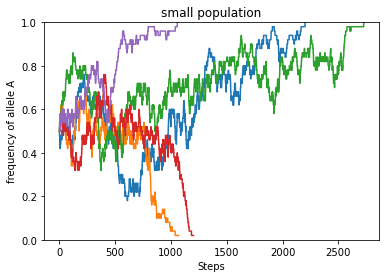

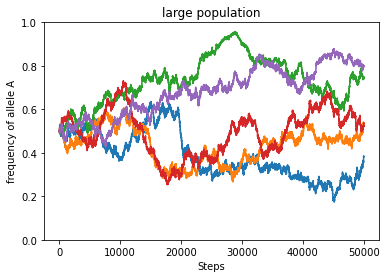

In [82]:
import random

def NeutralRW(max_time, N, f0):
    # delta_t (an arbitrary small value)
    delta_t = 1;
    
    # initialize at f=f0 for t=0
    f     = [f0]
    times = [0]
    
    # the runnning variables
    time  = times[-1]
    thisf = f[-1]
    while(times[-1] < max_time):
        
        p = thisf*(1-thisf)
        q = 1 - 2*p
        #print(p, q, 2*p+q, time)

        # update the running variables according to the random walk rules
        if p<0.5 and q > 0 and p > 0:
            time  += delta_t
            thisf += np.random.choice([-1/N,1/N,0], p=[p,p,1-2*p])
        
            # append new time and new positon
            if (thisf > 0):
                f.append(thisf)
                times.append(time)
            else: break
        else: break

    return np.array(f),np.array(times)

f0 = random.random()
f0 = 0.5
max_time = 50000
N  = 50
for _ in range(5):
    fs,ts = NeutralRW(max_time, N, f0)
    plt.plot(ts,fs)
    #plt.xlim((0,max_time))
    plt.ylim((0,1))
plt.title('small population')
plt.xlabel('Steps')
plt.ylabel('frequency of allele A')
plt.show() 

N  = 500
for _ in range(5):
    fs,ts = NeutralRW(max_time, N, f0)
    plt.plot(ts,fs)
    #plt.xlim((0,max_time))
    plt.ylim((0,1))
plt.title('large population')
plt.xlabel('Steps')
plt.ylabel('frequency of allele A')
plt.show() 


## About the homework

For this week's homework we are going to be exploring random walks. A particular subset called continuous time random walks. algorithmically the way to define them is:

 1. Wait some time.
 2. Move under some rule.

Below is an example of code for random walks like the ones seen in class, where we are mooving with the tick of a clock

In [85]:
def random_walk(max_time, p = 0.5):
    q = 1-p # p happens or q happens
    
    # delta_t (an arbitrary small value)
    delta_t = 0.1;
    
    # initialize at x=0 for t=0
    positions = [0]
    times     = [0]
    
    # the runnning variables
    this_time     = times[-1]
    this_position = positions[-1]
    while(times[-1] < max_time):
        
        # update the running variables according to the random walk rules
        this_time     += delta_t
        this_position += np.random.choice([-1,1], p=[p,q])
        
        # append new time and new positon
        positions.append(this_position)
        times.append(this_time)

    return np.array(positions),np.array(times)

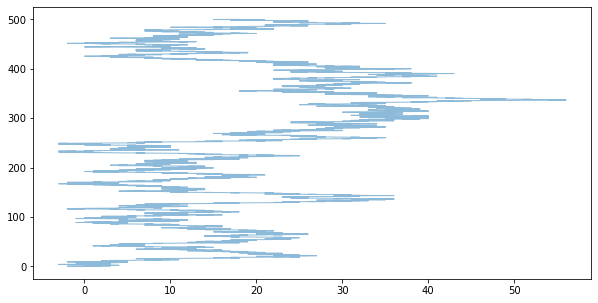

In [86]:
fig,ax = plt.subplots(ncols= 1,nrows =1,sharex = True)
fig.set_figwidth(10)
fig.set_figheight(5)
pos,time = random_walk(500)
ax.step(pos,time, ls='-', lw = 1, alpha = 0.5)

An additional challenge in the homework is that the length of our position arrays is most likely going to be different for every random walk simmulated, because the waiting time follows an exponential distribution.

So for all walks, the positions at a given index, correspond to the same time.

In [87]:
pos1,time1 = random_walk(500)
pos2,time2 = random_walk(500)

print("all RW have the same length:", len(pos1), len(pos2))

idx = 432
print("all RW have the same time at the same index. Times at idx = ", idx, ":", time1[idx], time2[idx])
print("positions at time ", time1[idx], "are given by ", pos1[idx], pos2[idx])

all RW have the same length: 5001 5001
all RW have the same time at the same index. Times at idx =  432 : 43.200000000000344 43.200000000000344
positions at time  43.200000000000344 are given by  14 14


But how do we do it when the arrays are of variable length?

We can use the time array to find the index in the position array. Below is an example, using the ordered time array on how to find the closest index to a particular time.

We are going to take advantage of the fact that time is monotonically increasing and two `numpy` functions:

- `np.abs()`
- `np.argmin()`

Our time array:

If we wanted to find the index where time = 100 we could subtract 100 to make that position 0. **Pay attention to the y axis:**

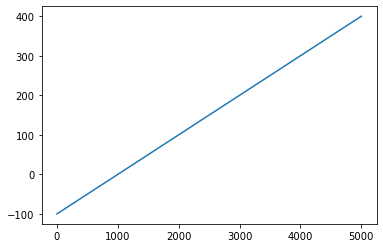

In [88]:
plt.plot(time-100)

all the time values before 100 are now negative and all the values above 100 are greater than 0. if we avaluate the absolute value:

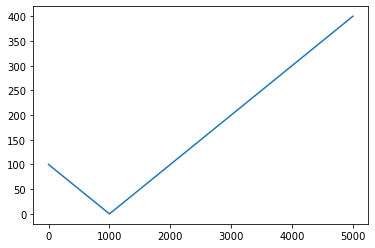

In [89]:
plt.plot(np.abs(time-100))

`np.argmin()` returns the index of the smallest value in the array, we artificially made the desired index the smallest value and now we can find out what it is.


In [90]:
positions,times = random_walk(500)
time = 50
idx_for_time = np.argmin(np.abs(times-time))
print("idx for time", time, "is", idx_for_time)
print("time at idx =", idx_for_time, "is", times[idx_for_time])
print("position at time", time, "is", positions[idx_for_time])

idx for time 50 is 500
time at idx = 500 is 50.00000000000044
position at time 50 is 28




### Inverse sampling

Let's go all the way back to week 0!

Recall that the PDF of an exponential distribution is given by:

$$ PDF(t) = \frac{1}{\lambda} e^{-t/\lambda}$$

The CDF has a nice easy closed form solution:
$$\begin{aligned}
 CDF(t) &= \int_0^t \frac{1}{\lambda} e^{-t'/\lambda} dt' \\
 &= \frac{1}{\lambda} \big[ -\lambda e^{-t'/\lambda}\big] \bigg\vert^{t'=t}_{t' = 0}\\
  &= - \big[ e^{-t/\lambda} - e^0\big] \\
  &= 1 - e^{-t/\lambda}
 \end{aligned}$$

Recall that the CDF of any random variable is distributed as a Uniform(0, 1). In uniform sampling, we use this fact and generate Uniform(0, 1) random numbers, then use the inverse of the CDF to get our samples of interest.

In other words, if we sample a random number $0 \leq x \leq 1$, then the relationship with a sampled time $t$ is:

$$x = CDF(t) \implies t = CDF^{-1}(x)$$



$$\begin{aligned}
CDF(t) = 1-e^{-t/\lambda} &= x \\
1-x &= e^{-t\lambda} \\
\log(1-x) &= \frac{-t}{\lambda} \implies t = -\lambda \log (1-x) = CDF^{-1}(x)
\end{aligned}$$

Great, we have a function serving as the inverse of the CDF for $t$, so we can transform a Uniform(0, 1) variable $x$ to a sampled time $t$.

We can simplify a bit further and recognize that if $x \sim Unif(0, 1)$, then $1-x$ is also a random number between $[0, 1]$, so we can simply take

$$t = -\lambda \log(x)$$



In [38]:
import numpy as np
import matplotlib.pyplot as plt

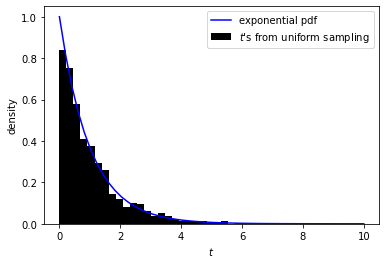

In [94]:
def draw_time(lam):
  x = np.random.uniform(0, 1)
  return -lam * np.log(x)

def expo_pdf(t, lam):
  return 1/lam * np.exp(-t/lam)

lam = 1
sampled_ts = [draw_time(lam) for i in range(1000)]

plt.figure()
plt.hist(sampled_ts, density=True, color='k', bins=30, label='$t$\'s from uniform sampling')
ts = np.linspace(0, 10*lam)
plt.plot(ts, expo_pdf(ts, lam), color='b', label='exponential pdf')
plt.legend()
plt.xlabel('$t$'); plt.ylabel('density')
plt.show()

## Analytic expressions for mean/variance of walker positions at particular times

In your random walk implementation, we would like you to report the mean/variance in positions at two different time points. What follows is how to get to the analytic expressions for the mean/variance, which you can use to compare to what you see in experiments.

In class, we went through the probability of being at position $x$ after $N$ steps:      

$$P(x\mid t/\tau=N) = \frac{N!}{\left(\frac{N-x}{2}\right)!\left(\frac{N+x}{2}\right)!} \left(\frac{1}{2}\right)^N$$

We derived the mean and variance of the unbiased ($p = q = 1/2$) random walk:

$$\begin{aligned}
\langle x \rangle &= N(p-q) = 0 \\   
\langle x^2 \rangle &= 4Npq = N
\end{aligned}$$

In class, we used a fixed time step $\tau$, so we could directly link displacement with a number of steps. On the homework though, we have wait times, so that will influence the total number of steps taken to get t oa position. So, we need to marginalize over the number of moves:

$$\begin{aligned}
P(x \mid t) &= \sum_{N=0}^\infty P(x, N \mid t) \\
&= \sum_{N=0}^\infty P(x \mid N)P(N \mid t)
\end{aligned}$$

In class, we only studied the no-wait time case, where

$$P(N \mid t) = \delta\bigg(N = \frac{t}{\tau}\bigg) =
\left\{
\begin{array}{cc}
1   & \mbox{for}\ N = \frac{t}{\tau}\\
0  & \mbox{for}\ N \neq \frac{t}{\tau}
\end{array}
\right.$$

On the homework, we assume that wait times between our steps follow an exponential distribution. The probability density for the number of steps in a time period $t$ follows a Poisson distribution (see the P.S. below for intuition why):

$$P(N \mid t) = \left( \frac{t}{\lambda} \right)^N \frac{e^{-t/\lambda}}{N!} $$

So, we can plug in:
$$\begin{aligned}
P(x \mid t) &= \sum_{N=0}^\infty P(x, N \mid t) \\
&= \sum_{N=0}^\infty P(x \mid N)P(N \mid t) \\  
&= \sum_{N=0}^\infty \left[ \frac{N!}{\left(\frac{N-x}{2}\right)!\left(\frac{N+x}{2}\right)!} \left(\frac{1}{2}\right)^N \right] \left[ \left( \frac{t}{\lambda} \right)^N \frac{e^{-t/\lambda}}{N!} \right]
\end{aligned}$$

Now we are ready to compute the mean of $x$:

$$\begin{aligned}
\langle x \rangle &= \sum_x x P(x \mid t) \\
 &= \sum_x x \sum_{N=0}^\infty  \frac{N!}{\left(\frac{N-x}{2}\right)!\left(\frac{N+x}{2}\right)!} \left(\frac{1}{2}\right)^N  \left( \frac{t}{\lambda} \right)^N \frac{e^{-t/\lambda}}{N!}
\end{aligned}$$

There's a neat trick here!

At $x=0$, we get a 0. When $x=+1$, because of the symmetry in the denominator, that perfectly cancels out the case of $x=-1$, the same is true for $x=+2, x=-2$, etc. so after summing over all possible $x$, $\langle x \rangle = 0$.

Now let's find the variance:      

$$\begin{aligned}
Var(x) &= \langle x^2 \rangle - \langle x \rangle^2 \\   
&= \langle x^2 \rangle \\   
&= \sum_x x^2 \sum_{N=0}^\infty  \frac{N!}{\left(\frac{N-x}{2}\right)!\left(\frac{N+x}{2}\right)!} \left(\frac{1}{2}\right)^N  \left( \frac{t}{\lambda} \right)^N \frac{e^{-t/\lambda}}{N!} \\
&=  \sum_{N=0}^\infty \left[ \sum_x x^2 \frac{N!}{\left(\frac{N-x}{2}\right)!\left(\frac{N+x}{2}\right)!} \left(\frac{1}{2}\right)^N \right ] \left( \frac{t}{\lambda} \right)^N \frac{e^{-t/\lambda}}{N!} \\
&=  \sum_{N=0}^\infty N \left( \frac{t}{\lambda} \right)^N \frac{e^{-t/\lambda}}{N!} \\
&=  e^{-t/\lambda}   \sum_{N=0}^\infty \frac{ \left( \frac{t}{\lambda} \right)^N}{(N-1)!}\\
&=  \frac{t}{\lambda}  e^{-t/\lambda}  \sum_{N=0}^\infty \frac{ \left( \frac{t}{\lambda} \right)^{N-1}}{(N-1)!}\\
&=  \frac{t}{\lambda}  e^{-t/\lambda} e^{t/\lambda}\\
&= \frac{t}{\lambda}
\end{aligned}$$

### P.S.

Why is it the case that $P(N \mid t)$ follows a Poisson distribution if wait times between steps follow the exponential distribution?

Well here's one way to see this works, going from the opposite direction.

In a Poisson process with rate $1/\lambda$, the number of events (steps) $N$ between time $0$ and time $t$ is:     

$$P(N \mid t) = \frac{\left(\frac{t}{\lambda}\right)^N}{N!}{e^{-t/\lambda}}$$

Now let's say $T$ is when the first event happens after the previous event happened at time $0$.

Using the definition above, the statement "no events happen up to time $t$" is equivalent to the condition "$T > t$" and "$N = 0 \mid t $". If those conditions correspond to the same thing, their probabilities must also be the same. So let's write them:

$$\begin{aligned}
P(T > t) &= P(N = 0 \mid t) \\   
&= \frac{\left(\frac{t}{\lambda}\right)^0}{0!}{e^{-t/\lambda}}\\    
&= e^{-t/\lambda}\\
\end{aligned}$$

We used what we know about the Poisson PMF to fill out the right hand side, and we have a nice expression for the left hand side. But what does this mean? The probability that the first event (at time $T$) happens after $t$ is $e^{-t/\lambda}$. So the probability that the first event happens before time $t$ is:

$$P(T \leq t) = 1 - P(T > t) = 1 - e^{-t/\lambda}$$

We have just recovered the CDF of an exponential distribution. So $T$, the timing between two events (in our case, the events are steps $N$), follows an exponential distribution.
